<a href="https://colab.research.google.com/github/AbhishekIH2005/python/blob/main/Titanic_Passenger.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Titanic Passenger Survial Prediction


##1. Problem Statements
During the Titanic disaster, passenger survival was influenced by factors such as age, gender, and passenger class.
The objective of this project is to build a binary classification machine learning model to predict whether a passenger survived (Yes/No) using historical passenger data and to identify the most important factors affecting survival.

##Objectives of the project
* Understand passenger survival patterns
* Perform basic data preprocessing
* Conduct minimal but meaningful EDA
* Build binary classification models
* Evaluate model performance
* Identify key survival-influencing features

##Machine Learning Workflow

In [ ]:
from google.colab import files
uploaded=files.upload()


Saving train.csv to train.csv


In [ ]:

import pandas as pd
df=pd.read_csv("train.csv")
print(df)


     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
print("dataset shape:",df.shape)

dataset shape: (891, 12)


In [ ]:
df.shape

(891, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
886,False
887,False
888,False
889,False


In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


##Handling the missing values

In [ ]:
#Handling missing values
num_cols=["Age"]
for col in num_cols:
  df[col]=df[col].fillna(df[col].median())
num_col1=["Embarked"]
for c in num_col1:
  df[c]=df[c].fillna(df[c].mode())
print(df)
if 'Cabin' in df.columns:
  df.drop(columns=['Cabin'],inplace=True)


     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [ ]:
#categorical columns
cat_cols=['Embarked']

#with for loop

for cols in cat_cols:
  df[col]=df[col].fillna(df[col].mode()[0])
  print(df)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [ ]:
df.isnull().sum()


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
df['Sex']=df['Sex'].replace({
    'M':'Male',
    'male':'Male',
    'F':'Female',
    'female':'Female'
})
print(df)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    Male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  Female  38.0      1   
2                               Heikkinen, Miss. Laina  Female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  Female  35.0      1   
4                             Allen, Mr. William Henry    Male  35.0      0   
..                                                 ...     ...   ... 

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Embarked']=le.fit_transform(df['Embarked'])
print(df)


     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    Male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  Female  38.0      1   
2                               Heikkinen, Miss. Laina  Female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  Female  35.0      1   
4                             Allen, Mr. William Henry    Male  35.0      0   
..                                                 ...     ...   ... 

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Use double brackets to select multiple columns as a list
df[["Age", "Fare"]] = scaler.fit_transform(df[["Age", "Fare"]])

In [ ]:
df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

In [ ]:
x=df.drop('Survived', axis=1)
y=df['Survived']

In [ ]:
X=df[['Pclass','Age','Fare','Embarked']]
y=df['Survived']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(
    X,y,test_size=0.2,random_state=42
)

##Exploratory Data Analysis

Graph1

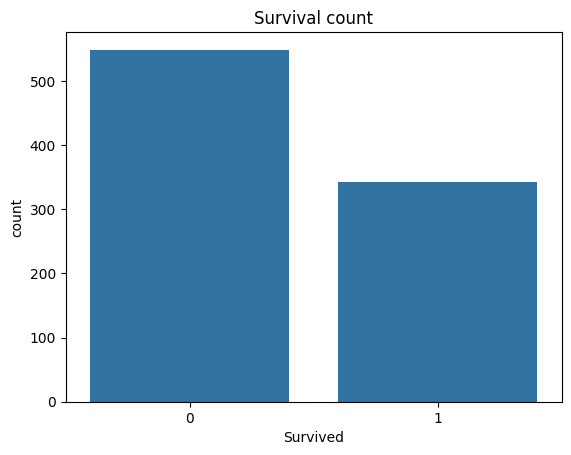

In [ ]:
import matplotlib.pyplot as plt

import seaborn as sns
sns.countplot(x='Survived', data=df)
plt.title("Survival count")
plt.show()


Graph2

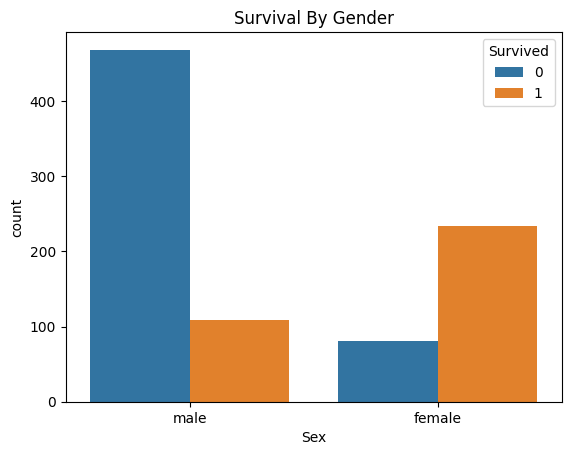

In [ ]:
sns.countplot(x='Sex',hue='Survived', data=df)
plt.title("Survival By Gender")
plt.show()


Graph3

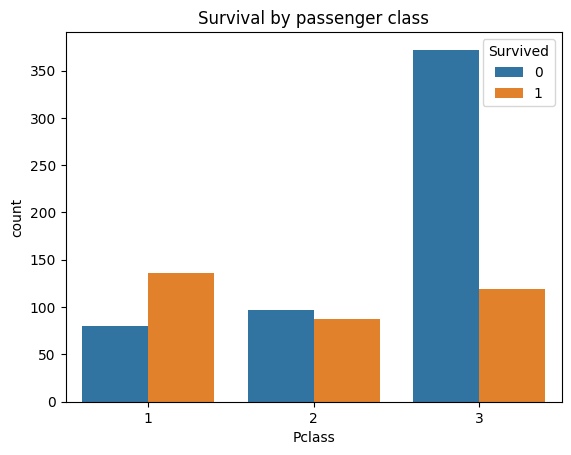

In [ ]:
sns.countplot(x='Pclass',hue='Survived',data=df)
plt.title("Survival by passenger class")
plt.show()


Graph4

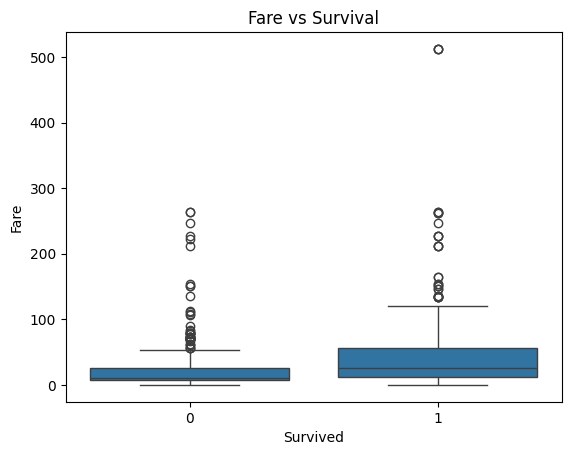

In [ ]:
sns.boxplot(x='Survived',y='Fare', data=df)
plt.title("Fare vs Survival")
plt.show()


## 6. Models Used

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["Sex"]=le.fit_transform(df["Sex"])
df["Embarked"]=le.fit_transform(df["Embarked"])
print(df)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name  Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    1  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1   
2                               Heikkinen, Miss. Laina    0  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1   
4                             Allen, Mr. William Henry    1  35.0      0   
..                                                 ...  ...   ...    ...   
886        

In [ ]:
X=df[["Pclass","Sex","Age","Parch","Fare","Embarked"]]
y=df[["Survived"]]

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(
    X,y,test_size=0.2, random_state=42
)


Logistic Regression

In [ ]:
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [ ]:
predicted=model.predict([[3,1,22,0,7.2500,2]])
print("survived(1) or not(0) :",predicted[0])


survived(1) or not(0) : 0


In [ ]:
##Decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score


In [ ]:
X=df[["Pclass","Sex","Age","Parch","Fare","Embarked"]]
y=df[["Survived"]]


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(
    X,y,test_size=0.2, random_state=42
)


In [ ]:
model=DecisionTreeClassifier(criterion="gini",max_depth=3)
model.fit(X_train,y_train)


DecisionTreeClassifier(max_depth=3)

In [ ]:
y_pred=model.predict(X_test)
print("Predicted:", y_pred)


Predicted: [0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0
 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 0 1
 0 0 1 1 1 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1
 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1]


In [ ]:
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7988826815642458


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=42)
rf.fit(X_train,y_train)
y_pred_rf= rf.predict(X_test)


/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


##Model Evaluation

In [ ]:
def evaluate_model(y_test,y_pred):
  print("Accuracy:",accuracy_score(y_test,y_pred))
  print("Precision:",precision_score(y_test,y_pred))
  print("Recall:",recall_score(y_test,y_pred))
  print("F1_score:",f1_score(y_test,y_pred))
evaluate_model(y_test,y_pred)


Accuracy: 0.7988826815642458
Precision: 0.796875
Recall: 0.6891891891891891
F1_score: 0.7391304347826086


In [ ]:
Confusion matrix graph
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred_rf)


Graph 1

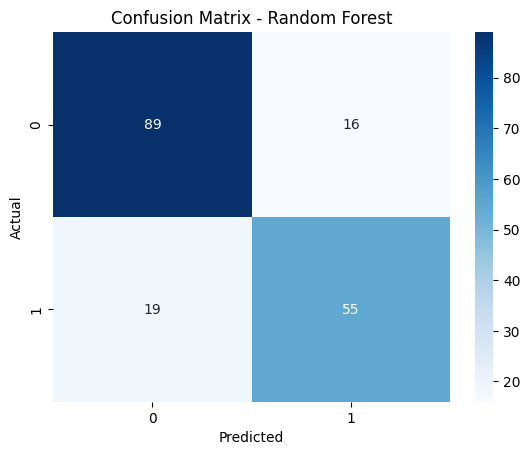

In [ ]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()


In [ ]:
##classification report
print(classification_report(y_test,y_pred_rf))
# Feature importances
importances = rf.feature_importances_
feature = X.columns

              precision    recall  f1-score   support

           0       0.82      0.85      0.84       105
           1       0.77      0.74      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.80      0.80      0.80       179



In [ ]:

feat_df = pd.DataFrame({
    'Feature': feature,
    'Importance':importances
}).sort_values(by='Importance',ascending=False)


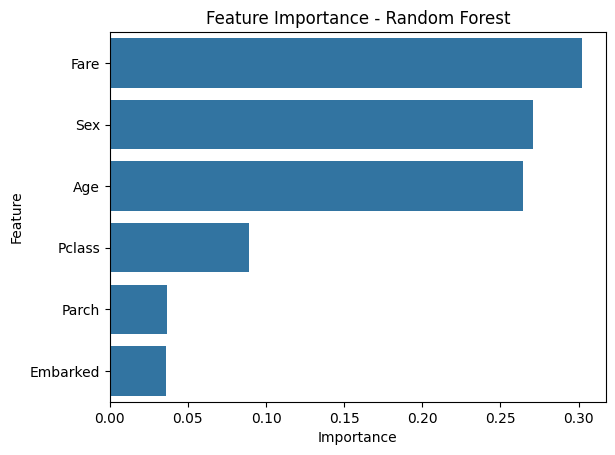

In [ ]:
sns.barplot(x='Importance',y='Feature',data=feat_df)
plt.title('Feature Importance - Random Forest')
plt.show()
